In [ ]:
!pip install python_speech_features
!pip install pysoundfile

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## MFCC

One option is to use the Mel-frequency cepstral coefficients (MFCCs). These can be interpreted as transformations of audio segments to a fixed-length vector space (multidimensional array with length dimensions controlled by numcep parameter below, also note that one may have to take certain considerations with the nfft parameter). This is the approach used by authors in a recent paper on Multimodal TikTok Misinformation Detection (Shang, Lanyu, et al. "A Multimodal Misinformation Detector for COVID-19 Short Videos on TikTok." 2021 IEEE International Conference on Big Data. IEEE, 2021.)

Execution time to read file and compute FCC features is: 8.77016019821167


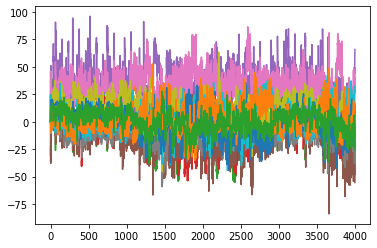

(3999, 13)


In [ ]:
import soundfile as sf
import matplotlib.pyplot as plt 
from python_speech_features import mfcc
import time
%matplotlib inline

start = time.time()
# Read podcast audio file
sig, rate = sf.read('/drive/My Drive/2wzj7tYTG3vquzBEYeXfAT.ogg')
sig = sig[0:int(20*rate)] # Take first 20 seconds (this will eventually be the timestamps corresponding to the claims)
mfcc_feat = mfcc(sig, rate, numcep = 13, nfft=1500)
end = time.time()
print("Execution time to read file and compute MFCC features is:", end - start)
plt.plot(mfcc_feat)
plt.show()
print(mfcc_feat.shape)

As a rough estimate of our audio segments I use 20 seconds for the claim and the surrounding context. It takes about 8 seconds to read the original file and compute its MFCC features for the 20 second segment, so this computation may add significant time in inference time (for training time it should be fine). 

The idea is we can feed the MFCC features of the corresponding audio segments to the classifier as well. 